In [15]:
import dask
import matplotlib.pyplot as plt
import numpy as np
from dask.distributed import Client

In [16]:
client = Client(n_workers=4)
client

C:\Users\yangchen\anaconda3\lib\site-packages\distributed\node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50931 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:50932' processes=4 threads=8, memory=15.83 GiB>

In [17]:
def cir():    
    x = np.random.uniform()
    y = np.random.uniform()
    if x*x+ y*y <=1:
        return 1
    else:
        return 0
    
@dask.delayed
def add(n):
    num = 0
    for i in range(n):
        num = num + cir()
    return num

In [18]:
n = 1000000
l = []

for i in range(4):
    l.append(add(250000))

results = dask.delayed(sum)(l)*4/n

In [19]:
%%time 
results.compute()

CPU times: total: 250 ms
Wall time: 1.79 s


3.141436

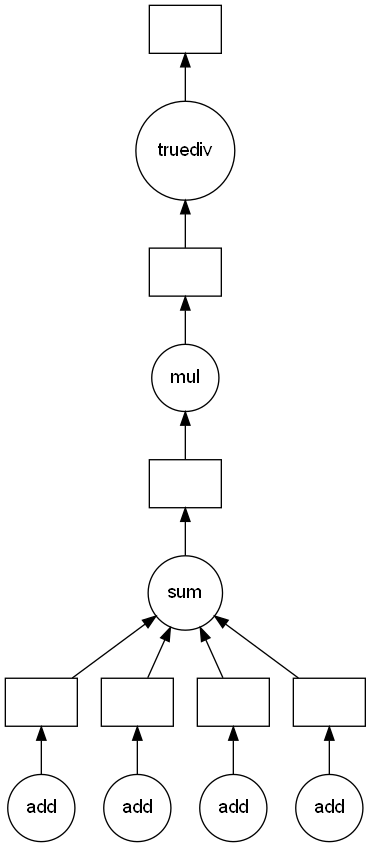

In [20]:
results.visualize()